In [208]:
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_excel(r'C:\Users\THINK\Documents\ML\CW5\Lab6_data.xlsx')
data

,DEPT [MD],VP [m/s],VSX [m/s],VSY [m/s],PAR1,PAR2,PAR3,PAR4,PAR5
0,1050.0,3055,1531,1573,49766683317413,1.490218e-07,88,8.917627e+12,1.629024e+10
1,1050.1,3034,1517,1552,51917976630989,1.447758e-07,98,-4.181219e+13,1.711206e+10
2,1050.2,3025,1510,1539,52937501416995,1.421186e-07,101,-2.550837e+13,1.750000e+10
3,1050.3,3016,1504,1526,53973542181495,1.395260e-07,105,-5.251573e+13,1.789574e+10
4,1050.4,3030,1498,1523,54823457877834,1.388839e-07,106,-6.034015e+14,1.809355e+10
...,...,...,...,...,...,...,...,...,...
5496,1599.6,3733,2034,2071,13609554270627,2.733877e-07,91,2.045102e+12,3.645742e+09
5497,1599.7,3707,2015,2062,14206635106093,2.707722e-07,78,7.324942e+12,3.832381e+09
5498,1599.8,3700,2003,2050,14608036300629,2.671700e-07,97,7.927936e+12,3.948118e+09
5499,1599.9,3678,1995,2039,14888536496071,2.641442e-07,80,2.134940e+13,4.047998e+09


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5501 entries, 0 to 5500
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DEPT [MD]  5501 non-null   float64
 1   VP [m/s]   5501 non-null   int64  
 2   VSX [m/s]  5501 non-null   int64  
 3   VSY [m/s]  5501 non-null   int64  
 4   PAR1       5501 non-null   int64  
 5   PAR2       5501 non-null   float64
 6   PAR3       5501 non-null   int64  
 7   PAR4       5501 non-null   float64
 8   PAR5       5501 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 386.9 KB


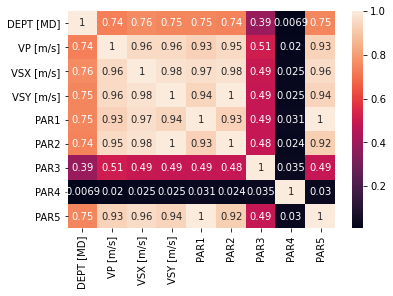

In [6]:
sns.heatmap(data.corr().abs(),annot=True)

Par2 i VSY sa wspoliniowe , PAR1 I PAR5 tez 

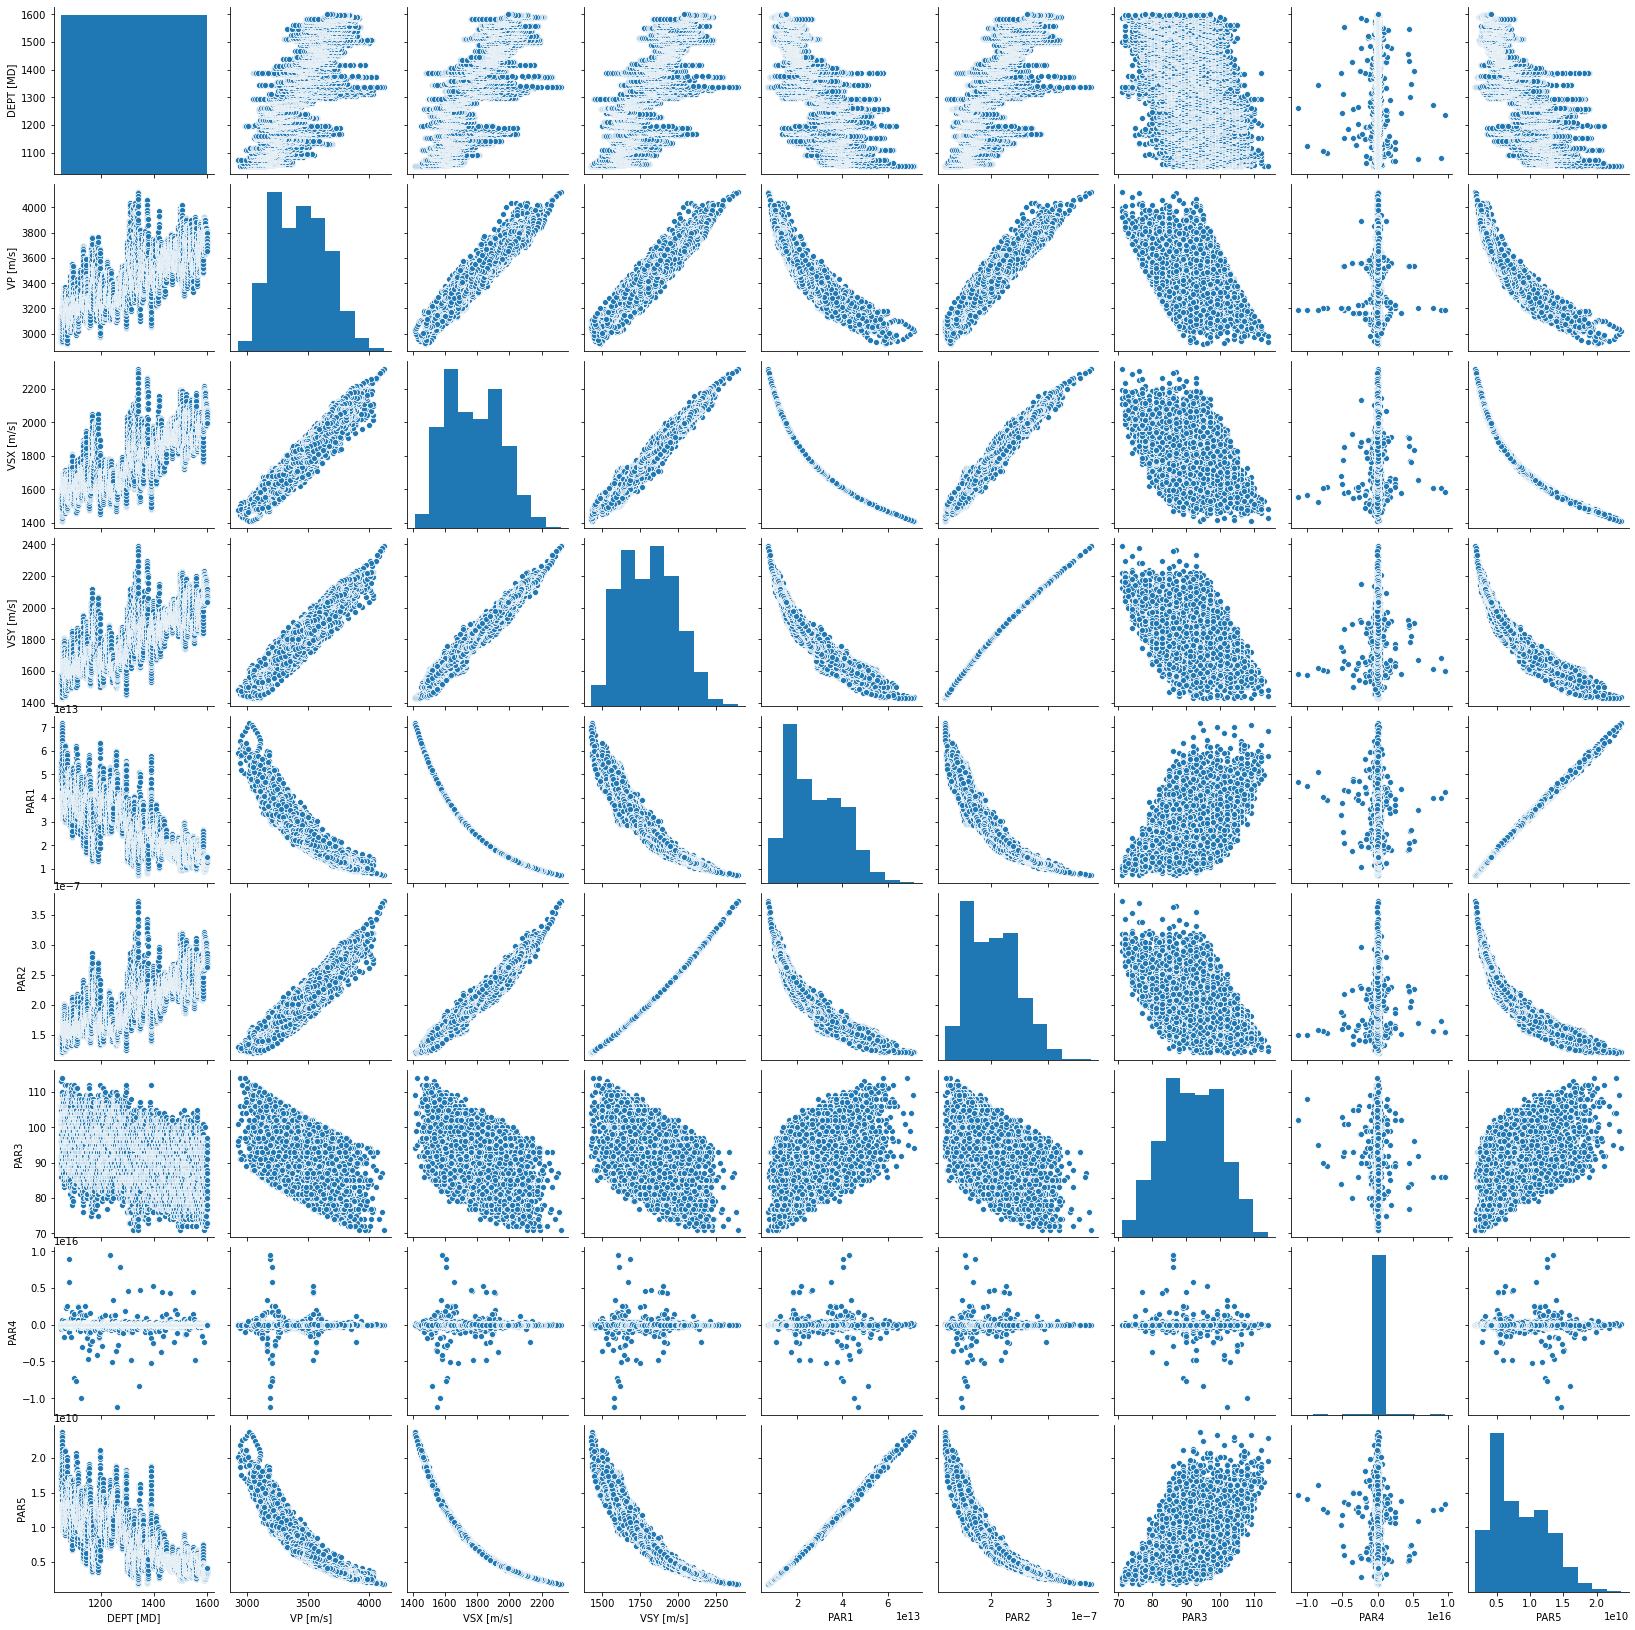

In [150]:
sns.pairplot(data)

PAR3 PAR4 - brak liniowej zaleznosci

In [154]:
from scipy import stats

for col in data.columns:
    print(col,":",stats.shapiro(data[col].sample(3000)))


DEPT [MD] : ShapiroResult(statistic=0.9523138403892517, pvalue=3.238536589396781e-30)
VP [m/s] : ShapiroResult(statistic=0.9828882813453674, pvalue=1.4269922289772264e-18)
VSX [m/s] : ShapiroResult(statistic=0.9718344211578369, pvalue=7.386231662190074e-24)
VSY [m/s] : ShapiroResult(statistic=0.9806628227233887, pvalue=8.380095053705979e-20)
PAR1 : ShapiroResult(statistic=0.9518007636070251, pvalue=2.3597686100101888e-30)
PAR2 : ShapiroResult(statistic=0.9713379144668579, pvalue=4.679093355008149e-24)
PAR3 : ShapiroResult(statistic=0.9897400140762329, pvalue=6.957414787518712e-14)
PAR4 : ShapiroResult(statistic=0.20164000988006592, pvalue=0.0)
PAR5 : ShapiroResult(statistic=0.9422555565834045, pvalue=1.0050538412983976e-32)


PAR4 nie spelnia

In [ ]:
plt.errorbar(x=data["VSX [m/s]"],y=data["VP [m/s]"])

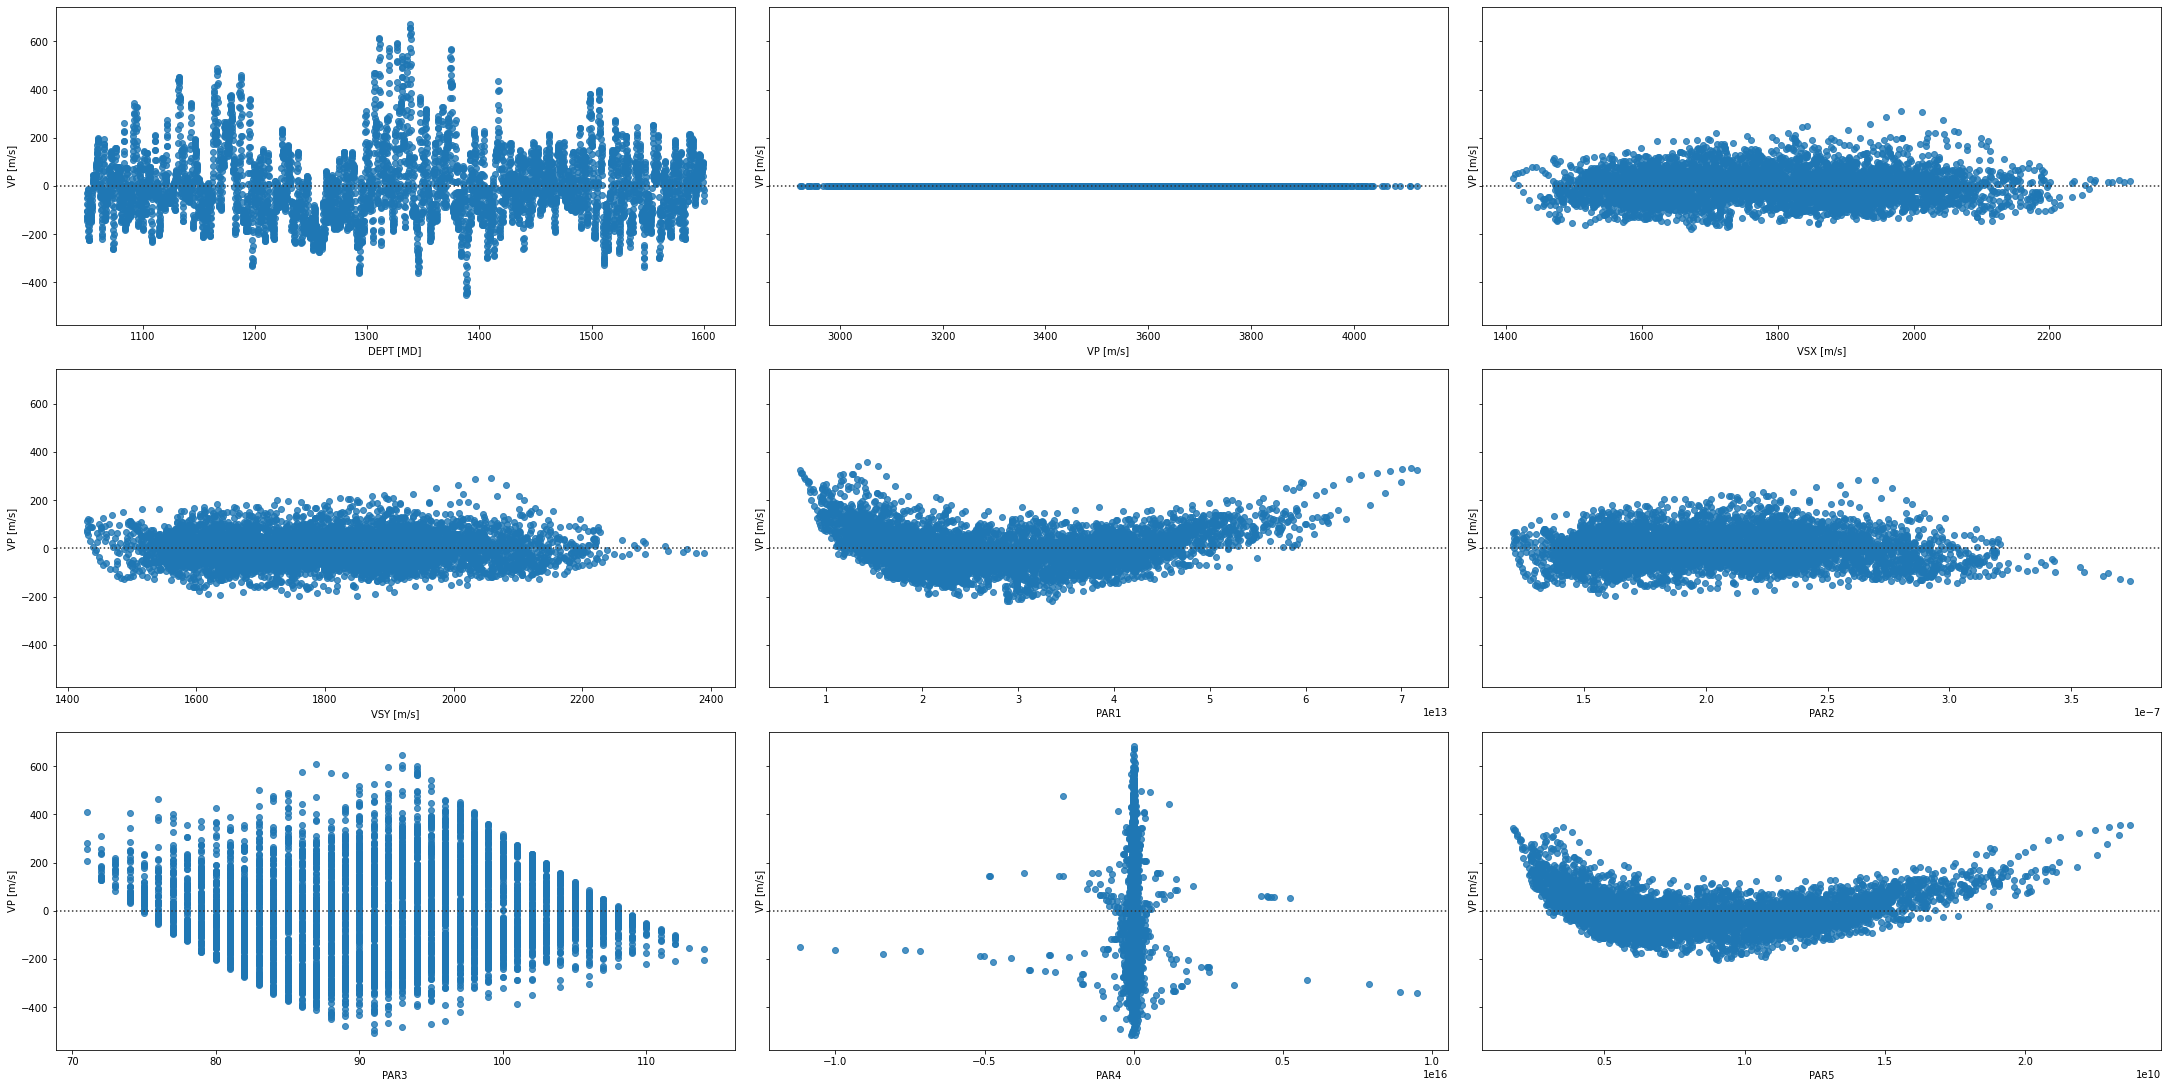

In [149]:
fig, axes = plt.subplots(3,3,sharey=True,constrained_layout=True,figsize=(30,15))
cols = data.columns
k=0
for i in range(3):
    for j in range(3):
        sns.residplot(x=cols[k],y="VP [m/s]",data=data,ax=axes[i,j])
        k+=1
                                              

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data["VP [m/s]"], test_size=0.3, random_state=0)


In [172]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for col in col_names:
    reg = LinearRegression().fit(pd.DataFrame(X_train[col]), y_train)
    PredTest = reg.predict(pd.DataFrame(X_test[col]))
    xd1 = reg.score(pd.DataFrame(X_test[col]), y_test)
    xd4 = mean_squared_error(y_test,PredTest)
    print(col,":",xd1,xd4)

VSX [m/s] : 0.9142501740180069 4072.6836940960507
VSY [m/s] : 0.9101963099137853 4265.221766870819
PAR1 : 0.8652577884665896 6399.574594283116
PAR2 : 0.907160614408066 4409.401973008848
PAR3 : 0.2658249961860486 34869.60506804853
PAR4 : -0.0019110944293221355 47585.71729431964
PAR5 : 0.8715333295333471 6101.5180853453585


In [218]:
reg = LinearRegression().fit(pd.DataFrame(X_train["VSX [m/s]"]), y_train)
PredTest = reg.predict(pd.DataFrame(X_test["VSX [m/s]"]))
PredTrain = reg.predict(pd.DataFrame(X_train["VSX [m/s]"]))
xd1 = reg.score(pd.DataFrame(X_test["VSX [m/s]"]), y_test)
xd4 = mean_squared_error(y_test,PredTest)

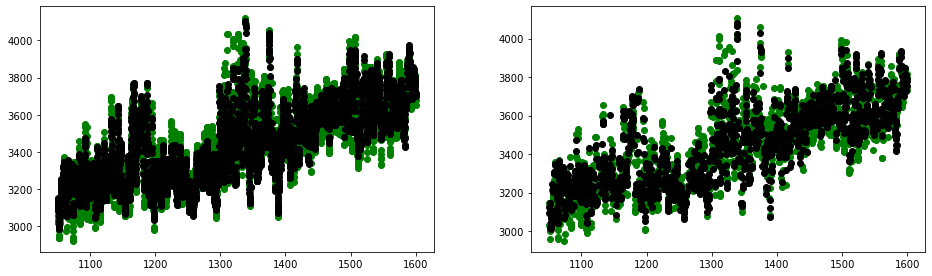

In [219]:
from matplotlib import pyplot as plt
fig, ax =plt.subplots(1,2)
fig.tight_layout()
fig.set_figwidth(14)
ax[0].scatter(X_train["DEPT [MD]"], y_train,color='g')
ax[0].scatter(X_train["DEPT [MD]"], PredTrain,color='k')
ax[1].scatter(X_test["DEPT [MD]"], y_test,color='g')
ax[1].scatter(X_test["DEPT [MD]"], PredTest,color='k')

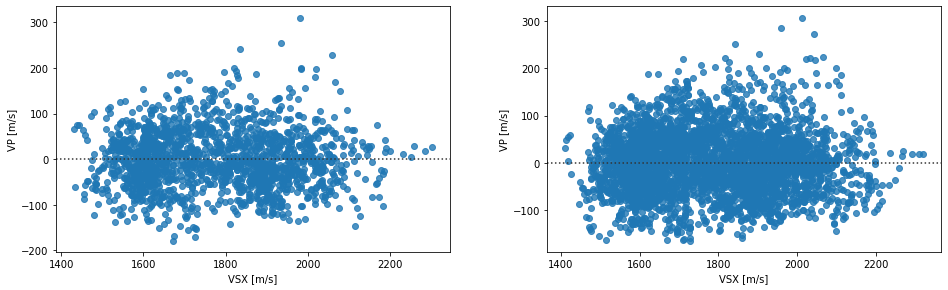

In [220]:
fig, ax =plt.subplots(1,2)
fig.tight_layout()
fig.set_figwidth(14)
sns.residplot(X_test["VSX [m/s]"],y_test,ax=ax[0])
sns.residplot(X_train["VSX [m/s]"],y_train,ax=ax[1])

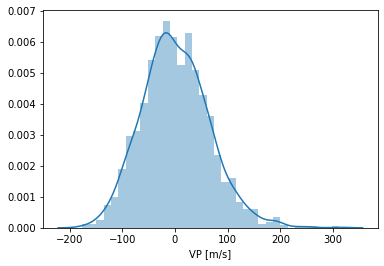

In [225]:
X_train, X_test, y_train, y_test = train_test_split(data, data["VP [m/s]"], test_size=0.3, random_state=0)
reg = LinearRegression().fit(pd.DataFrame(X_train), y_train)

PredTrain = reg.predict(X_train)
PredTest = reg.predict(X_test)

xd1 = reg.score(X_test, y_test)
xd2 = reg.score(X_train, y_train)

xd3 = mean_squared_error(y_test,PredTest)
xd4 = mean_squared_error(y_train,PredTrain)
print(xd1,xd2,xd3,xd4)


importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

0.9999998459730434 0.9999997602661254 0.007315502597244947 0.011491271628356718
Feature: 0, Score: 0.00004
Feature: 1, Score: 1.00001
Feature: 2, Score: 0.00001
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00020
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000


In [240]:
PredTest

array([3439.2820356 , 3101.25231897, 3401.42810013, ..., 3512.10256128,
       3334.65616005, 3636.64382303])

In [236]:
X_train[["VSX [m/s]","PAR3","PAR4"]]

,VSX [m/s],PAR3,PAR4
206,1651,89,2.250525e+15
2178,1676,82,1.121733e+14
4697,1899,91,-2.696413e+12
2493,1873,90,1.804746e+13
648,1500,90,5.541679e+13
...,...,...,...
4931,2071,82,1.267467e+13
3264,1810,104,-1.075001e+13
1653,1586,109,3.810699e+13
2607,1959,90,1.466294e+13


In [237]:
from sklearn.model_selection import train_test_split
col_names = ["DEPT [MD]","VSX [m/s]","PAR3","PAR4"]
X_train, X_test, y_train, y_test = train_test_split(data[col_names], data["VP [m/s]"], test_size=0.3, random_state=0)
reg = LinearRegression().fit(X_train[["VSX [m/s]","PAR3","PAR4"]], y_train)

PredTrain = reg.predict(X_train[["VSX [m/s]","PAR3","PAR4"]])
PredTest = reg.predict(X_test[["VSX [m/s]","PAR3","PAR4"]])

xd1 = reg.score(X_test[["VSX [m/s]","PAR3","PAR4"]], y_test)
xd2 = reg.score(X_train[["VSX [m/s]","PAR3","PAR4"]], y_train)

xd3 = mean_squared_error(y_test,PredTest)
xd4 = mean_squared_error(y_train,PredTrain)
print(xd1,xd2,xd3,xd4)


importance = reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

0.9176880142121078 0.9166324639046965 3909.4036461066516 3996.0935997568217
Feature: 0, Score: 1.19876
Feature: 1, Score: -1.33708
Feature: 2, Score: -0.00000


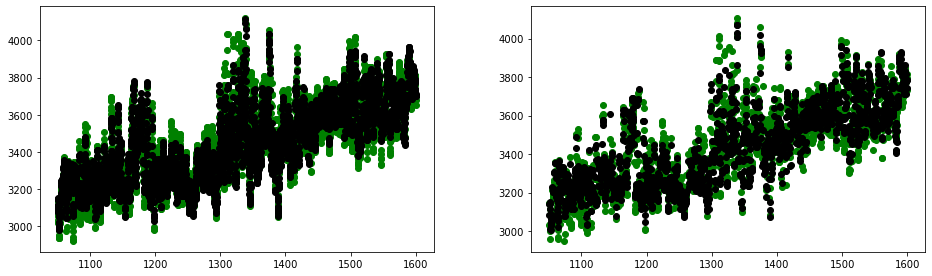

In [238]:
from matplotlib import pyplot as plt
fig, ax =plt.subplots(1,2)
fig.tight_layout()
fig.set_figwidth(14)
ax[0].scatter(X_train["DEPT [MD]"], y_train,color='g')
ax[0].scatter(X_train["DEPT [MD]"], PredTrain,color='k')
ax[1].scatter(X_test["DEPT [MD]"], y_test,color='g')
ax[1].scatter(X_test["DEPT [MD]"], PredTest,color='k')

C:\Users\THINK\anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


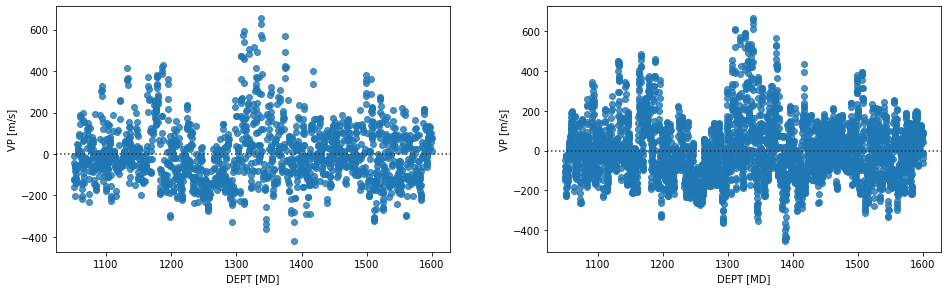

In [239]:
fig, ax =plt.subplots(1,2)
fig.tight_layout()
fig.set_figwidth(14)
sns.residplot(X_test["DEPT [MD]"],y_test,ax=ax[0])
sns.residplot(X_train["DEPT [MD]"],y_train,ax=ax[1])
fig.show()